In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import json
import utils2 as u2
from matplotlib import pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

IMAGE_PATH = "../assets/images/graphs"

rng = np.random.default_rng(101)

(<Figure size 432x432 with 1 Axes>,
 <Axes: title={'center': 'Example of a Demand Curve'}, xlabel='$q$', ylabel='$p$'>)

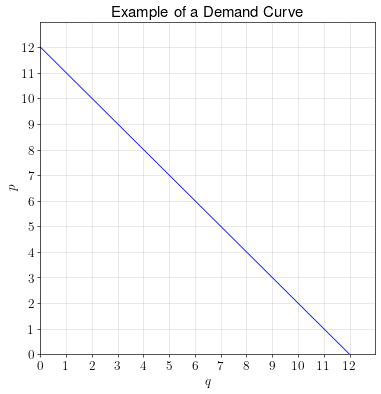

In [2]:
demand = u2.LinearDemand(12,1,color='blue')
supply = u2.LinearSupply(2,1,color='red')
axis = u2.Axis(xlab=r'$q$',ylab=r'$p$',title="Example of a Demand Curve")
axis.add(demand)
axis.draw(saveas=f"{IMAGE_PATH}/lec01_notes_demand.png")

(<Figure size 432x432 with 1 Axes>,
 <Axes: title={'center': 'Example of a Supply Curve'}, xlabel='$q$', ylabel='$p$'>)

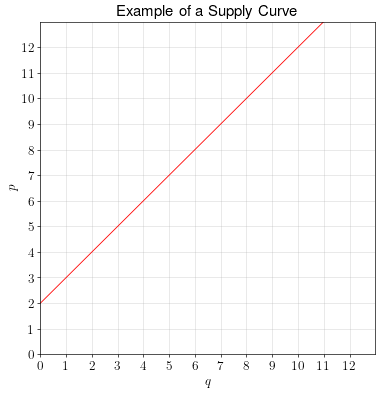

In [3]:
axis = u2.Axis(xlab=r'$q$',ylab=r'$p$',title="Example of a Supply Curve")
axis.add(supply)
axis.draw(saveas=f"{IMAGE_PATH}/lec01_notes_supply.png")

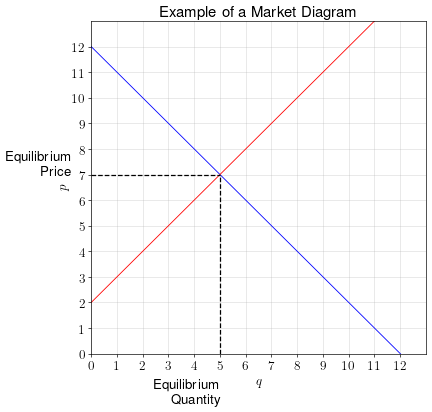

In [11]:
axis = u2.Axis(xlab=r'$q$',ylab=r'$p$',title="Example of a Market Diagram")
axis.add(demand, supply)
fig, ax = axis.draw()
ax.plot([0,5],[7,7],color='black',linestyle='dashed',label='_nolegend_')
ax.plot([5,5],[0,7],color='black',linestyle='dashed',label='_nolegend_')
ax.text(-0.75,7,'Equilibrium\nPrice',horizontalalignment='right')
ax.text(5,-1,'Equilibrium\nQuantity',horizontalalignment='right',verticalalignment='top')
plt.savefig(f"{IMAGE_PATH}/lec01_notes_market.png",bbox_inches='tight')

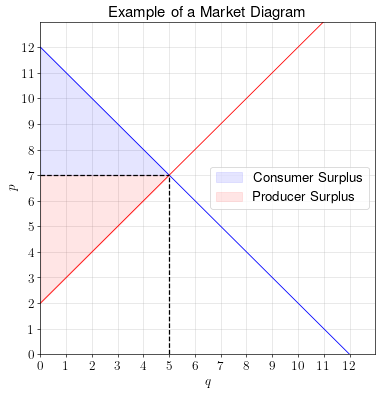

In [15]:
axis = u2.Axis(xlab=r'$q$',ylab=r'$p$',title="Example of a Market Diagram")
axis.add(demand, supply)
fig, ax = axis.draw()
plt.fill_between([0,5],7,[12,7],color='blue',alpha=0.1,label='Consumer Surplus')
plt.fill_between([0,5],[2,7],7,color='red',alpha=0.1,label='Producer Surplus')
ax.plot([0,5],[7,7],color='black',linestyle='dashed',label='_nolegend_')
ax.plot([5,5],[0,7],color='black',linestyle='dashed',label='_nolegend_')
ax.legend()
plt.savefig(f"{IMAGE_PATH}/lec01_notes_surplus.png",bbox_inches='tight')


Supply and demand in a market are defined by the following equations:
\begin{align*}
q_d &= 24-\frac{4}{3}p \\
q_s &= 2p-16 
\end{align*}

{'q': 8.0, 'p': 12.0, 'CS': 24.0, 'PS': 16.0, 'TS': 40.0}


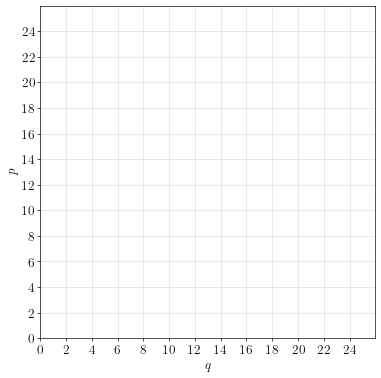

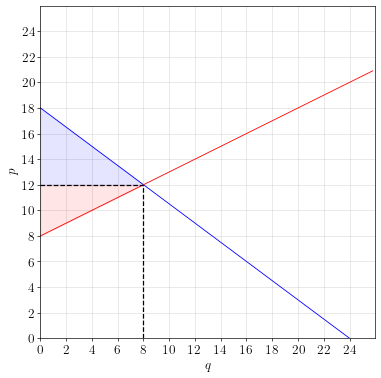

In [25]:
params = {'ad':24*3/4,'bd':3/4,'as':8,'bs':1/2,'xunit':2,'yunit':2}
problem = u2.load_problem('LinearMarketProblem',params)
problem.axis.get_figax(saveas=f"{IMAGE_PATH}/lec01_example_setup.png")
fig, ax = problem.axis.draw()
ax.fill_between([0,8],12,[18,12],color='blue',alpha=0.1,label='Consumer Surplus')
ax.fill_between([0,8],[8,12],12,color='red',alpha=0.1,label='Producer Surplus')
ax.plot([0,8],[12,12],color='black',linestyle='dashed',label='_nolegend_')
ax.plot([8,8],[0,12],color='black',linestyle='dashed',label='_nolegend_')
plt.savefig(f"{IMAGE_PATH}/lec01_example_solution.png",bbox_inches='tight')
print(problem.setup_list[0]['setup'])
print(problem.sol)